In [4]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


Reading reference image :  1.jpg
Reading image to align :  2.jpg


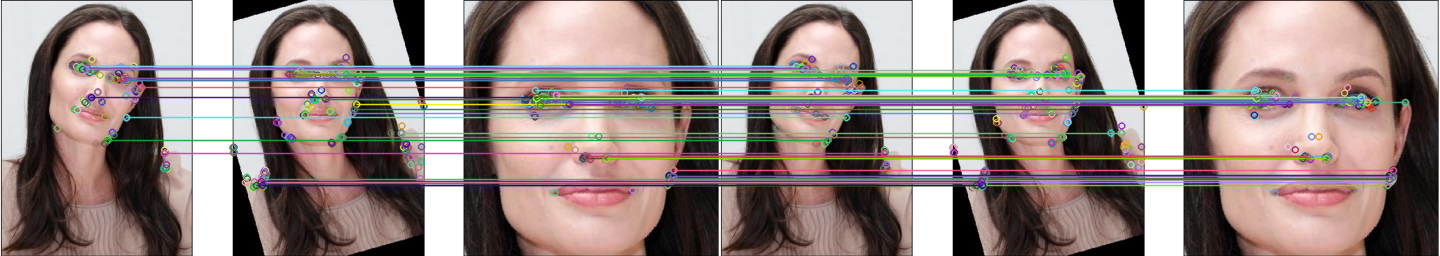

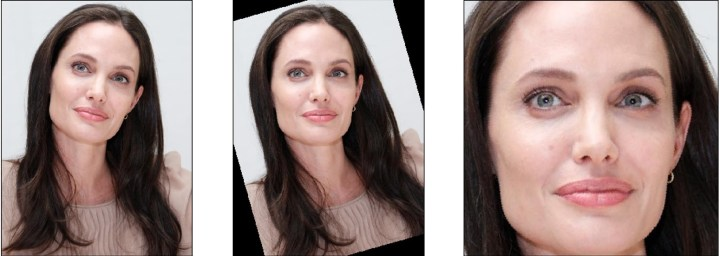

In [3]:
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15

def alignImages(im1, im2):

  im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
  im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
  
  orb = cv2.ORB_create(MAX_FEATURES)
  keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
  keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)
  
  matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
  matches = matcher.match(descriptors1, descriptors2, None)
  
  matches.sort(key=lambda x: x.distance, reverse=False)

  numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
  matches = matches[:numGoodMatches]

  imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
  cv2_imshow(imMatches)
  
  points1 = np.zeros((len(matches), 2), dtype=np.float32)
  points2 = np.zeros((len(matches), 2), dtype=np.float32)

  for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt
  
  h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

  height, width, channels = im2.shape
  im1Reg = cv2.warpPerspective(im1, h, (width, height))
  
  return im1Reg, h

refFilename = "1.jpg"
print("Reading reference image : ", refFilename)
imReference = cv2.imread(refFilename, cv2.IMREAD_COLOR)

imFilename = "2.jpg"
print("Reading image to align : ", imFilename);  
im = cv2.imread(imFilename, cv2.IMREAD_COLOR)
  
imReg, h = alignImages(im, imReference)
cv2_imshow(imReg)

  